In [8]:
import pandas as pd
import collections as cl

data = pd.read_csv('hn_stories.csv', header=None)
data.columns = ['submission_time', 'upvotes', 'url', 'headline']

data.head(5)

,submission_time,upvotes,url,headline
0,2014-06-24T05:50:40.000Z,1,flux7.com,8 Ways to Use Docker in the Real World
1,2010-02-17T16:57:59Z,1,blog.jonasbandi.net,Software: Sadly we did adopt from the construc...
2,2014-02-04T02:36:30Z,1,blogs.wsj.com,Google’s Stock Split Means More Control for L...
3,2011-10-26T07:11:29Z,1,threatpost.com,SSL DOS attack tool released exploiting negoti...
4,2011-04-03T15:43:44Z,67,algorithm.com.au,Immutability and Blocks Lambdas and Closures


In [9]:
headlines = data['headline'].tolist()    
# print(headlines[0:5])
    
all_lines = ' '.join(str(h).lower() for h in headlines)
words = all_lines.split(' ')
# print(words[0:10])

word_count = cl.Counter(words)
word_count.most_common(40)

[('the', 2046),
 ('to', 1642),
 ('a', 1276),
 ('of', 1170),
 ('for', 1140),
 ('in', 1037),
 ('and', 936),
 ('', 733),
 ('is', 620),
 ('on', 568),
 ('hn:', 537),
 ('with', 537),
 ('how', 526),
 ('-', 487),
 ('your', 480),
 ('you', 392),
 ('ask', 371),
 ('from', 310),
 ('new', 304),
 ('google', 303),
 ('why', 262),
 ('what', 258),
 ('an', 243),
 ('are', 223),
 ('by', 219),
 ('at', 213),
 ('show', 205),
 ('web', 192),
 ('it', 192),
 ('–', 184),
 ('do', 183),
 ('app', 178),
 ('i', 173),
 ('as', 161),
 ('not', 160),
 ('that', 160),
 ('data', 157),
 ('about', 154),
 ('be', 154),
 ('facebook', 150)]

In [19]:
def remove_sub(url) :    
    words = str(url).split('.')
    Len = len(words)
    
    if Len <= 2 :
        return url
    return ''.join([words[Len-2], '.', words[Len-1]])    
    
data['domain'] = data['url'].apply(remove_sub)

urls = data['url'].value_counts()
domains = data['domain'].value_counts()

for name, count in urls.items() :
    if count < 40 : 
        break       
    print('url :', "{0}: {1}".format(name, count))

for name, count in domains.items() :
    if count < 40 : 
        break       
    print('domain :', "{0}: {1}".format(name, count))            

url : github.com: 174
url : techcrunch.com: 172
url : youtube.com: 142
url : nytimes.com: 109
url : medium.com: 88
url : wired.com: 76
url : arstechnica.com: 73
url : bbc.co.uk: 53
url : en.wikipedia.org: 49
url : online.wsj.com: 41
domain : co.uk: 233
domain : blogspot.com: 222
domain : github.com: 199
domain : techcrunch.com: 174
domain : nytimes.com: 145
domain : youtube.com: 143
domain : wordpress.com: 123
domain : google.com: 119
domain : medium.com: 88
domain : wired.com: 84
domain : arstechnica.com: 73
domain : wsj.com: 65
domain : com.au: 55
domain : tumblr.com: 53
domain : wikipedia.org: 53
domain : github.io: 42
domain : forbes.com: 41


In [61]:
import datetime as dt
from dateutil.parser import parse

def parse_year(time_str) :    
    return parse(time_str).year

def parse_month(time_str) :    
    return parse(time_str).month

def parse_weekday(time_str) :    
    return parse(time_str).isoweekday()

def parse_hour(time_str) :    
    return parse(time_str).hour 

def main() :
    
    data['year'] = data['submission_time'].apply(parse_year)  
    data['month'] = data['submission_time'].apply(parse_month)
    data['weekday'] = data['submission_time'].apply(parse_weekday)
    data['hour'] = data['submission_time'].apply(parse_hour)
    '''
    print(data['year'].value_counts().sort_index())
    print(data['month'].value_counts().sort_index())
    print(data['weekday'].value_counts().sort_index())
    print(data['hour'].value_counts().sort_index())    
    '''
main()

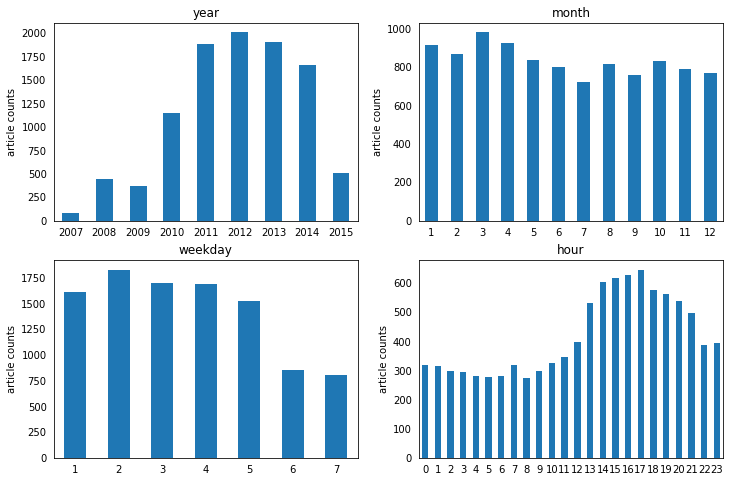

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
show_list = ['year', 'month', 'weekday', 'hour']

for i, item in enumerate(show_list) :    
    
    ax = fig.add_subplot(2, 2, i+1)
    ax = data[item].value_counts().sort_index().plot.bar(rot=0)
    
    ax.set_title(item)
    ax.set_ylabel('article counts')
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
plt.show()

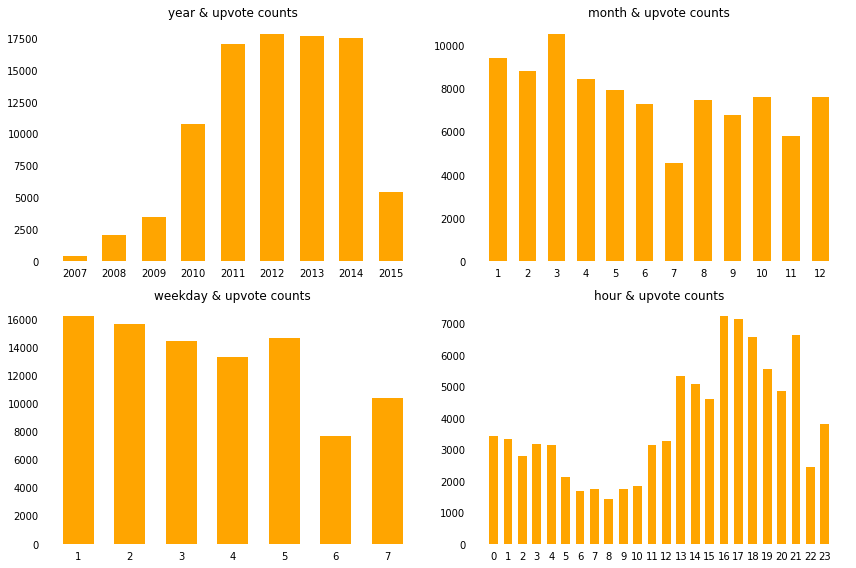

In [101]:
# How are the total numbers of upvotes changing over time?

import numpy as np

fig = plt.figure(figsize=(12, 8))
show_list = ['year', 'month', 'weekday', 'hour']

for i, item in enumerate(show_list) :
    
    total_upvotes = data.groupby(data[item]).agg(np.sum)
    total_upvotes.reset_index(inplace=True)
    
    ax = fig.add_subplot(2, 2, i+1)    
    ax.bar(total_upvotes[item], total_upvotes['upvotes'], 0.6, color='orange')
    
    ax.set_xticks(total_upvotes[item])       
    ax.set_title(item + ' & upvote counts')
    
    ax.tick_params(bottom="off", top="off", left="off", right="off")    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.tight_layout()    
plt.show()

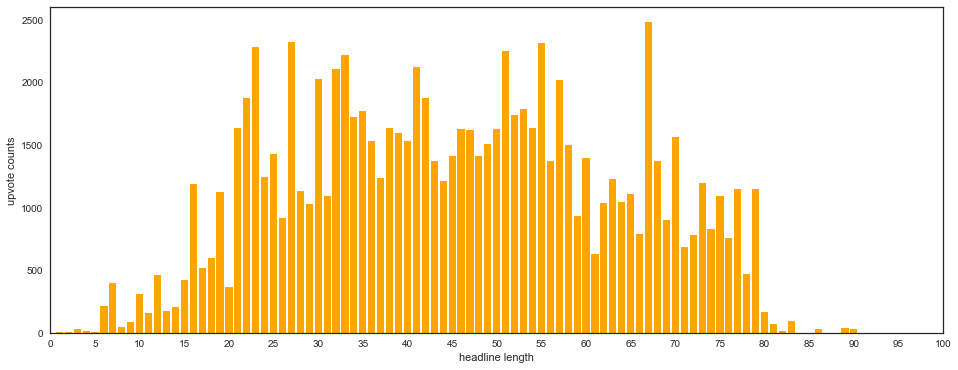

In [161]:
# What headline length leads to the most upvotes?

data['headline_len'] = data['headline'].apply(lambda x: len(str(x)))

total_upvotes = data.groupby(data['headline_len']).agg(np.sum)
total_upvotes.reset_index(inplace=True)

fig = plt.figure(figsize=(16, 6))
plt.bar(total_upvotes['headline_len'], total_upvotes['upvotes'], 0.8, color='orange')

xtick_list = []
for i in range(21) :
    xtick_list.append(i*5)

plt.xlim(0, 100)
plt.xticks(xtick_list) 
plt.ylabel('upvote counts')
plt.xlabel('headline length')

plt.show()